In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage import data_dir
from skimage.transform import radon, rescale

## Define some functions to generate the Radon transform (i.e. create the sinogram) and one to easy display original image and sinogram beside it

In [2]:
def make_sino(image,numproj):
    theta = np.linspace(0., 180., numproj, endpoint=False)
    sinogram = radon(image, theta=theta, circle=True)
    return sinogram

def proj_show(image,sinogram):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4.5))

    ax1.set_title("Original")
    ax1.imshow(image, cmap=plt.cm.Greys_r)

    ax2.set_title("Radon transform\n(Sinogram)")
    ax2.set_xlabel("Projection angle (deg)")
    ax2.set_ylabel("Projection position (pixels)")
    ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
    
    ax3.plot(np.arange(sinogram.shape[0]),sinogram[:,0])

    fig.tight_layout()
    plt.show()

## Generate a uniform disk and uniform concentric disks in a matrix of 512 x 512

In [3]:
x = np.arange(-256, 256, 1)
y = np.arange(-256, 256,1)
xx, yy = np.meshgrid(x, y, sparse=True)
uniform_disk = (xx**2 + yy**2 < 40000)

numdisks = 6
concentric_disk = np.zeros((512,512))
disk_thickness = 20 #pixels
for i in range(numdisks*2-1):
    
    if i == 0:
        concentric_disk = (xx**2 + yy**2 < (disk_thickness * (i+1))**2) #
    elif i%2 and np.sqrt((disk_thickness * (i+2))**2)<256:
#         print(np.sqrt((disk_thickness * (i+2))**2))
        concentric_disk +=  ((xx**2 + yy**2 > (disk_thickness * (i+1))**2)) & (xx**2 + yy**2 < (disk_thickness * (i+2))**2)


## Show the image and sinograms for the two disks

In [4]:
# Define number of projections
numproj = 180

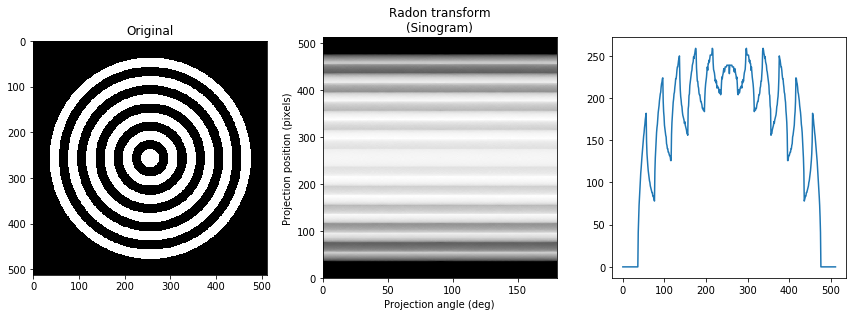

In [5]:
sinogram_disks = make_sino(concentric_disk,numproj)
proj_show(concentric_disk,sinogram_disks)

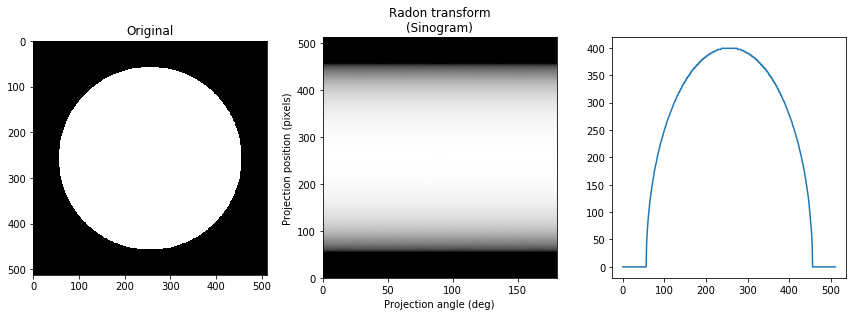

In [6]:
sinogram_unidisk = make_sino(uniform_disk,numproj)
proj_show(uniform_disk,sinogram_unidisk)

## Reconstruct from the sinograms

In [7]:
from skimage.transform import iradon

In [8]:
def reconstruct_fbp(image,sinogram,numproj):
    theta =  np.linspace(0., 180., numproj, endpoint=False)
    reconstruction_fbp = iradon(sinogram,theta=theta,circle=True)

    #imkwargs = dict(vmin=-0.2, vmax=0.2)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
    
    ax1.set_title("Original Image")
    ax1.imshow(image, cmap=plt.cm.Greys_r)
    ax2.set_title("Reconstruction\nFiltered back projection")
    ax2.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
    
    plt.show()

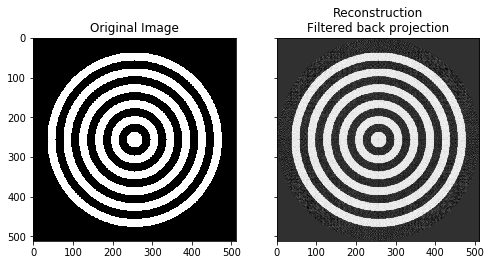

In [9]:
reconstruct_fbp(concentric_disk,sinogram_disks,numproj)

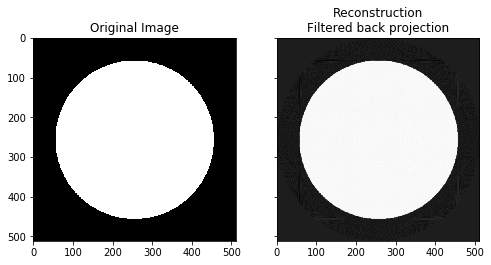

In [10]:
reconstruct_fbp(uniform_disk,sinogram_unidisk,numproj)